### Статистика для прямоугольных антенн

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('data/rects008.xlsx')

%matplotlib inline

In [2]:
def plot_step_stat(dframe, step, wire, ax=None, color=''):
    res = dframe.loc[(dframe['step (mm)'] == step)][['coil_n', 'L, uH']]
    res = res.sort_values(['coil_n'], ascending=[1])
    ax = res.plot(x='coil_n', y='L, uH', title=f'проводник={wire} мм, шаг={step} мм', ax=ax, color=color, label=f'{step} мм')
    ax.grid(linestyle='--')
    ax.set_xlim(0, 12)
    ax.set_ylabel('Индуктивность, мкГн')
    ax.set_xlabel('Кол-во витков')
    return ax

In [11]:
def plot_coil_n_stat(dframe, coil_n, wire, ax=None, color=''):
    res = dframe.loc[(dframe['coil_n'] == coil_n)][['step (mm)', 'L, uH']]
    res = res.sort_values(['step (mm)'], ascending=[1])
    ax = res.plot(x='step (mm)', y='L, uH', title=f'проводник={wire} мм, кол-во витков={coil_n}', ax=ax, color=color, label=f'{coil_n} шт')
    ax.grid(linestyle='--')
    ax.set_xlim(0, 0.6)
    ax.set_ylabel('Индуктивность, мкГн')
    ax.set_xlabel('Шаг, мм')
    return ax

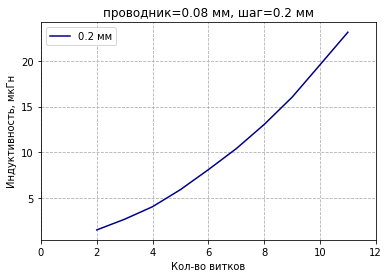

In [4]:
ax = plot_step_stat(df, step=0.2, wire=0.08, color='darkblue')


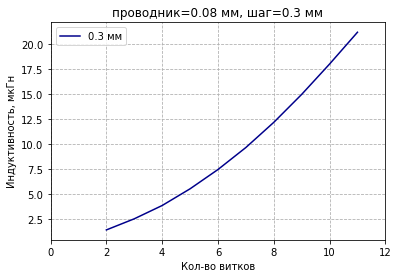

In [5]:
ax = plot_step_stat(df, step=0.3, wire=0.08, color='darkblue')


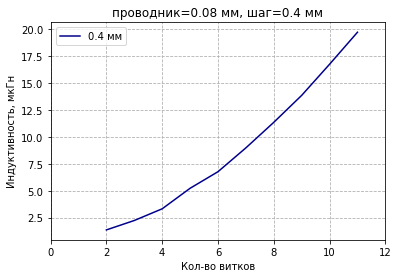

In [6]:
ax = plot_step_stat(df, step=0.4, wire=0.08, color='darkblue')


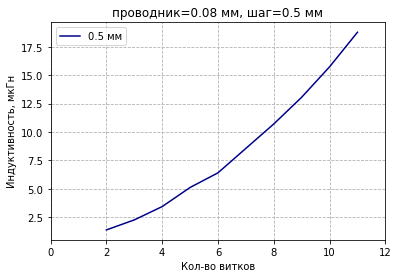

In [7]:
ax = plot_step_stat(df, step=0.5, wire=0.08, color='darkblue')


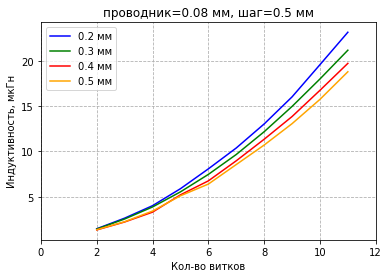

In [9]:
ax = plot_step_stat(df, step=0.2, wire=0.08, color='blue')
for st, col in zip([0.3, 0.4, 0.5], ['green', 'red', 'orange']):
    plot_step_stat(df, step=st, wire=0.08, color=col, ax=ax)

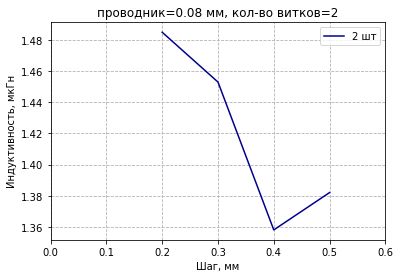

In [12]:
plot_coil_n_stat(df, coil_n=2, wire=0.08, color='darkblue')

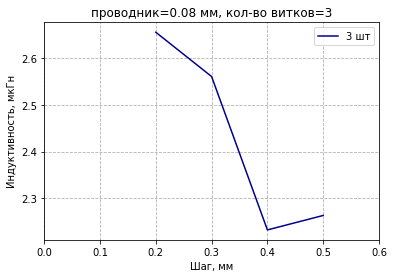

In [13]:
plot_coil_n_stat(df, coil_n=3, wire=0.08, color='darkblue')

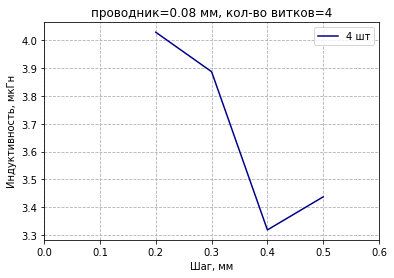

In [14]:
plot_coil_n_stat(df, coil_n=4, wire=0.08, color='darkblue')

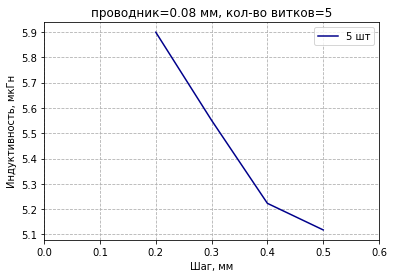

In [15]:
plot_coil_n_stat(df, coil_n=5, wire=0.08, color='darkblue')

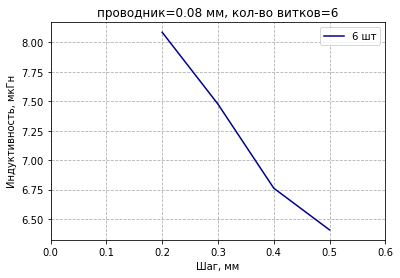

In [16]:
plot_coil_n_stat(df, coil_n=6, wire=0.08, color='darkblue')

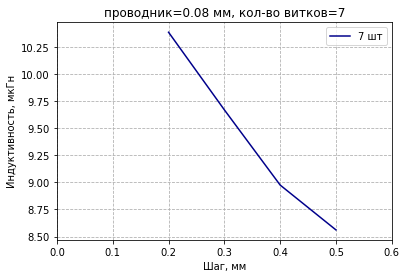

In [17]:
plot_coil_n_stat(df, coil_n=7, wire=0.08, color='darkblue')

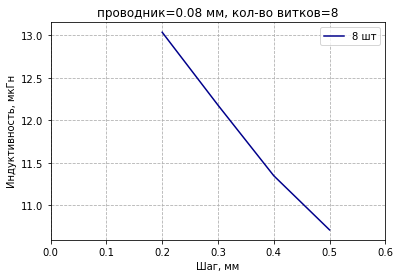

In [18]:
plot_coil_n_stat(df, coil_n=8, wire=0.08, color='darkblue')

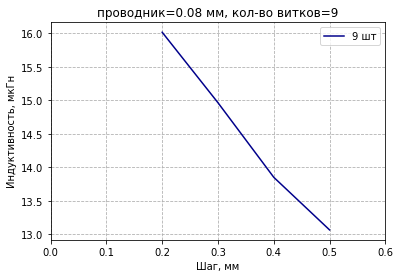

In [19]:
plot_coil_n_stat(df, coil_n=9, wire=0.08, color='darkblue')

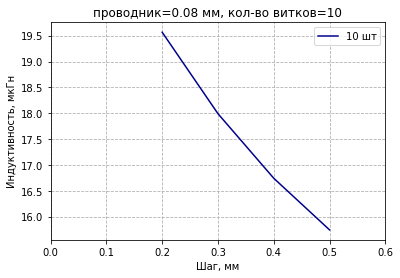

In [20]:
plot_coil_n_stat(df, coil_n=10, wire=0.08, color='darkblue')

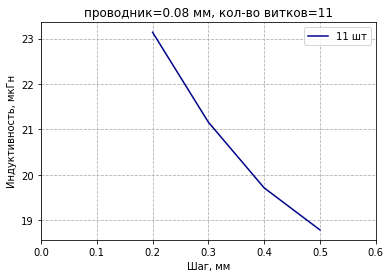

In [21]:
plot_coil_n_stat(df, coil_n=11, wire=0.08, color='darkblue')

In [23]:
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)
cmap = get_cmap(9)

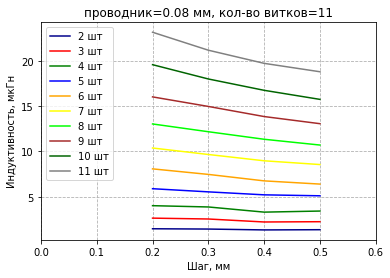

In [34]:
ax = plot_coil_n_stat(df, coil_n=2, wire=0.08, color='darkblue')
for st, col in zip(range(3, 12), ['red', 'green', 'blue', 'orange', 'yellow', 'lime', 'brown', 'darkgreen', 'grey']):
    plot_coil_n_stat(df, coil_n=st, wire=0.08, ax=ax, color=col)